In [1]:
import numpy as np
import pandas as pd

# Section 12: Data Visualization

**Data visualization** is the practice of producing graphical representations of data to convey a finding, summarize a concept, or get a quick understanding of the dataset we're working with.

In this section we'll cover:
* matplotlib
* plotting in Pandas, including:
  * bar charts
  * histograms
  * pie plots
  * scatter plots
  * jointplots
* an introduction to other dataviz libraries and concepts

We'll be answering various questions using different chart types, and we'll which graphs to use in which situations. Data visualization is critical to being able to communicate your data with colleagues and peers. Aspects of data visualization can also be incorporated into rich infographics. The possibilities are endless.

In this section we'll go from raw data to visual representations in a modest fashion. We'll start from the very basics and build up to more advanced graphs. Perhaps more important than the mechanics of building a graph is to understand when to use each type of graph to answer specific questions. It is important to use the correct chart in the right context to avoid producing misleading or nonsense graphs.

## The Preliminaries of matplotlib

**matplotlib** is a Python library that serves as the workhorse data visualization package that, among other things, powers the plotting methods in Pandas. Keep in mind, though, that matplotlib goes beyond Pandas and supports many backend applications. 

* https://matplotlib.org/stable/gallery/index.html

Let's start by generating from random data. We'll sample 400 random observations from the normal distribution.

In [2]:
np.random.normal(size = 400)

array([-2.53927722e-01, -8.57201643e-01, -8.36472996e-01,  2.04103231e-01,
        1.09290038e+00,  8.53155036e-01, -7.93776542e-01,  9.80624034e-01,
        1.31519822e+00, -3.77283644e-02, -1.30904820e+00,  3.65499015e-02,
        1.47170000e+00, -7.96952826e-01,  5.22434123e-01, -8.94965068e-01,
        4.37136455e-01, -2.01770336e+00,  1.53733601e+00, -1.85026068e-02,
        1.51577927e-02, -1.23519739e+00,  1.64830151e+00,  3.68057934e-01,
        7.73851851e-01,  1.47841115e+00,  4.85703089e-01, -2.81824338e-01,
       -4.41447973e-01, -3.24849830e-01,  1.28598281e+00,  2.50747290e+00,
       -8.61981883e-01, -6.60581309e-01,  1.91881332e-01, -1.03344872e-01,
       -1.00788451e-01,  2.62347864e-01, -1.59942300e+00,  1.13763197e+00,
       -1.51507730e+00,  1.08868817e+00, -2.15937274e+00, -2.30556171e+00,
        5.90029362e-01,  1.46870612e+00,  1.31304276e-01, -1.59203664e-01,
       -1.69602850e-01, -3.92932890e-01,  7.98090631e-01,  3.94701583e-01,
       -1.30261297e+00, -

In [3]:
x = np.random.normal(size = 400)

Let's now import matplotlib. We use the pyplot functions of matplotlib primarily, which are a collection of functions that make matplotlib work somewhat like MATLAB.
* https://matplotlib.org/stable/tutorials/introductory/pyplot.html

Referring to *pyplot* as `plt` is a convention in the community.

In [4]:
import matplotlib.pyplot as plt
# alternatively: from matplotlib import pyplot as plt

Let's plot our randomly sampled data. To do this we can use the simply method `plt.plot()`.

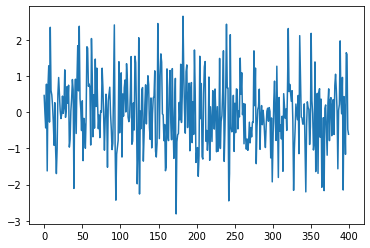

In [5]:
plt.plot(x)

Definitely not the most attractive plot, but it works. It produces a visualization of the data we passed in.

Instead of plotting each individual value, let's instead try plotting the cumulative sum such that we create the appearance of a series evolving through time.

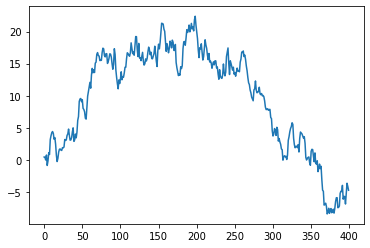

In [6]:
plt.plot(x.cumsum())

Notice that in addition to the plot itself, the code also outputs a Python list indicating its place in memory. The instructor doesn't find this particularly useful, and usually suppreses it by placing a semicolon at the end of the code line.

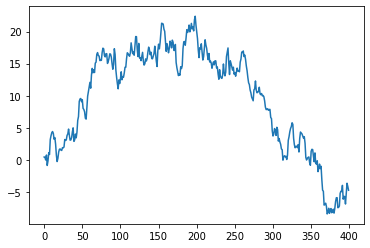

In [7]:
plt.plot(x.cumsum());

Now let's talk about styling. Matplotlib offers a rich interface to change many details of the plots. However, the instructor recommends starting with the built-in templates. 
Let's see what styles we have available.

In [8]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Let's pick one of them, say, `ggplot`.

In [9]:
plt.style.use('ggplot')

Now let's re-execute the plot

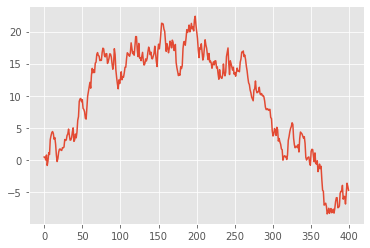

In [10]:
plt.plot(x.cumsum());

Looks nice! The instructor suggests trying others to see what you like.

What happens if we want to add more data to this plot? Let's start by generating another series of data.

In [11]:
y = np.random.normal(size = 400)

And then we plot it.

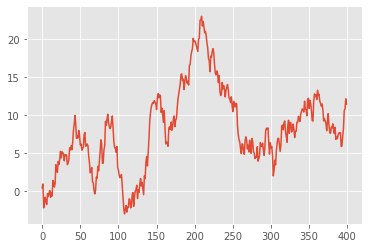

In [12]:
plt.plot(y.cumsum());

Okay so that worked, but we're getting our two series `x` and `y` on two separate plots. How do we get them onto the same figure? 

We can do this by placing them into the same code cell and executing that cell.

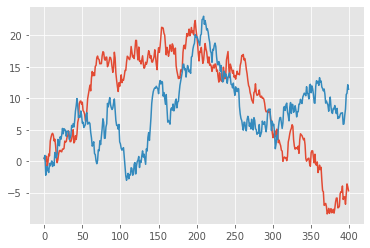

In [13]:
plt.plot(x.cumsum());
plt.plot(y.cumsum());

Cool! Notice how matplotlib has plotting both series on the same set of axes, and has automatically colored the two series differently. Colors can always be changed using the `color` parameter in the plot function.

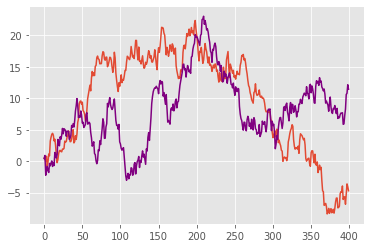

In [14]:
plt.plot(x.cumsum());
plt.plot(y.cumsum(), color = 'purple');

Our graph is pretty uninformative with **axis labels**. Let's add some!

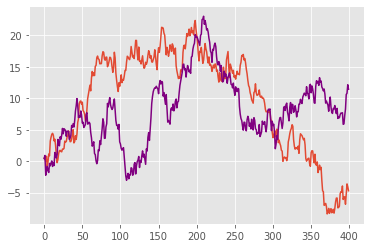

In [15]:
plt.plot(x.cumsum(), label = 'x');
plt.plot(y.cumsum(), color = 'purple', label = 'y');

So that didn't really do much. We still can't tell which series is which. To fix this, we can add a useful **legend**. This should be called within the same code cell/block as the plotting calls.

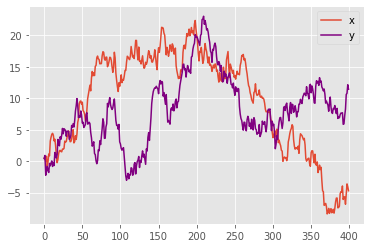

In [16]:
plt.plot(x.cumsum(), label = 'x');
plt.plot(y.cumsum(), color = 'purple', label = 'y');
plt.legend();

We've so far been using the word "plot" very loosely to refer to our graph that we see. However, the more technically correct term to use is **figure**, which is the *overall container that holds our plot*. 

The **figure** actually acts as a *grid* that holds or contains one or more individual graphs as *axes*. The axes within a figure refer to the space where the graph is plotted.

To demonstrate, let's get a hold of the figure and axes separately.


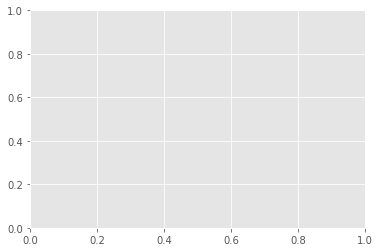

In [17]:
figure, axes = plt.subplots()

We now have a figure and a set of axes, with the figure showing. We can now replot our data as we did before, but this time we'll call it on the axes. Remember, the figure is just a container and the axes is where the plotting actually takes place.

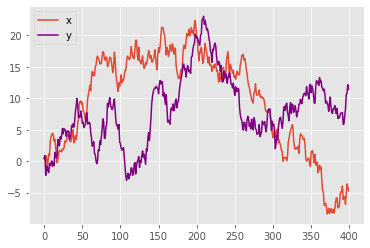

In [18]:
figure, axes = plt.subplots();
axes.plot(x.cumsum(), label = 'x');
axes.plot(y.cumsum(), color = 'purple', label = 'y');
axes.legend(loc = 'upper left');

Very nice. What else can we do? Perhaps we can squish the graph down a bit so that the plot is shorter and wider. For this, we need to change the size of the figure canvas. We do this by calling the `set_size_inches()` method on the `figure` object.
* https://www.geeksforgeeks.org/matplotlib-figure-figure-set_size_inches-in-python/



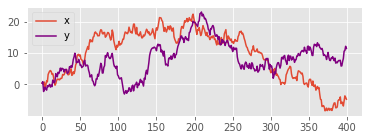

In [19]:
figure, axes = plt.subplots();
axes.plot(x.cumsum(), label = 'x');
axes.plot(y.cumsum(), color = 'purple', label = 'y');
axes.legend(loc = 'upper left');

figure.set_size_inches(6, 2)

Sure enough we now have a longer graph. Let's make it even longer!

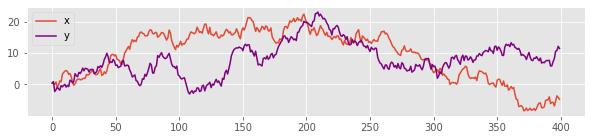

In [20]:
figure, axes = plt.subplots();
axes.plot(x.cumsum(), label = 'x');
axes.plot(y.cumsum(), color = 'purple', label = 'y');
axes.legend(loc = 'upper left');

figure.set_size_inches(10, 2)

The `plot()` method is actually an `axes` method. For convenience and quick access, it is also available on the pyplot object `plt`, which we saw above.

You can also have multiple plots (axes) within one figure. This involves passing in arguments for numbers of rows and columns into the `plt.subplots()` function. This tutorial outlines how.
* https://www.statology.org/matplotlib-multiple-plots/

## Line Graphs in Matplotlib

We shift our attention now to data visualization using Pandas, which relies on matplotlib under the hood. 

We'll start with **line graphs**, which are principally used for observing the change in a variable over a period of time. 

To visualize, we'll return to the brent crude prices.

In [21]:
import pandas as pd

In [22]:
brent = pd.read_csv('https://andybek.com/pandas-oil')

In [23]:
brent.head(3)

,Date,Price
0,04-Jan-00,23.95
1,05-Jan-00,23.72
2,06-Jan-00,23.55


As we recall, the data was fairly basic - it provided a sequence of prices and dates corresponding to those prices. In order to plot this in Pandas, we can call the `plot()` method on the data itself. We don't actually need to import pyplot or do any thing of that.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

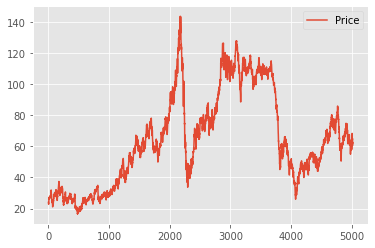

In [24]:
brent.plot();

Beautiful. That beauty of this "wrapper" that Pandas uses here is to give us a quick, easy way to build plots while also allowing for customization by directly accessing and setting matplotlib kwargs.

For instance, we can change the color as follows:

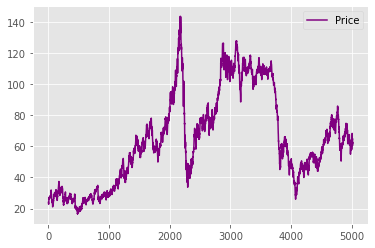

In [25]:
brent.plot(color = "purple");

Let's also bring back our tech giants dataframe, which consisted of stock prices for five of the biggest tech companies.

In [26]:
tech = pd.read_csv('https://andybek.com/pandas-tech')

In [27]:
tech.head()

,date,month,year,day,name,open,close,high,low,volume,volume_type
0,2014-01-02,1,2014,2,FB,54.86,54.71,55.22,54.19,43257622,medium
1,2014-01-02,1,2014,2,AAPL,79.38,79.02,79.58,78.86,8398851,low
2,2014-01-02,1,2014,2,GOOGL,557.73,556.56,558.88,554.13,1822719,medium
3,2014-01-02,1,2014,2,MSFT,37.35,37.16,37.40,37.10,30643745,medium
4,2014-01-02,1,2014,2,AMZN,398.80,397.97,399.36,394.02,2140246,medium


To plot this data, we'll re-import this data and parse the "date" column as datetimes and also set that column as the index. This will make plotting much easier, especially with automatic date formatting.

In [28]:
tech = pd.read_csv('https://andybek.com/pandas-tech', index_col = 0, parse_dates = True)

In [29]:
tech.head()

,month,year,day,name,open,close,high,low,volume,volume_type
date,,,,,,,,,,
2014-01-02,1,2014,2,FB,54.86,54.71,55.22,54.19,43257622,medium
2014-01-02,1,2014,2,AAPL,79.38,79.02,79.58,78.86,8398851,low
2014-01-02,1,2014,2,GOOGL,557.73,556.56,558.88,554.13,1822719,medium
2014-01-02,1,2014,2,MSFT,37.35,37.16,37.40,37.10,30643745,medium
2014-01-02,1,2014,2,AMZN,398.80,397.97,399.36,394.02,2140246,medium


In [30]:
tech.index

DatetimeIndex(['2014-01-02', '2014-01-02', '2014-01-02', '2014-01-02',
               '2014-01-02', '2014-01-03', '2014-01-03', '2014-01-03',
               '2014-01-03', '2014-01-03',
               ...
               '2019-08-22', '2019-08-22', '2019-08-22', '2019-08-22',
               '2019-08-22', '2019-08-23', '2019-08-23', '2019-08-23',
               '2019-08-23', '2019-08-23'],
              dtype='datetime64[ns]', name='date', length=7105, freq=None)

Nice! Notice the somewhat odd structure of the dataset. We've got all five tickers for each date, in that repeating pattern for over 4 years. In other words, we have multiple rows that use the same index. This is not very conductive to default plotting behavior.

For that reason, we'll need to reshape the data a bit. Suppose we want to plot the closing prices and dates. To do this, we'll create several new series containing only the data of interest (closing prices) for the companies we want to evaluate. Let's start with creating a series containing the closing prices for Facebook ("FB"). Our approach will be to use the `loc[]` indexer to select only rows corresponding to Facebook, and only take the "close" column. Additionally, we'll rename this series as "Facebook".

In [31]:
fb = tech.loc[tech.name == 'FB', 'close'].rename("Facebook")

In [32]:
fb

date
2014-01-02     54.71
2014-01-03     54.56
2014-01-06     57.20
2014-01-07     57.92
2014-01-08     58.23
               ...  
2019-08-19    186.17
2019-08-20    183.81
2019-08-21    183.55
2019-08-22    182.04
2019-08-23    177.75
Name: Facebook, Length: 1421, dtype: float64

Let's do the same for Microsoft and Apple.

In [33]:
msft = tech.loc[tech.name == 'MSFT', 'close'].rename("Microsoft")
aapl = tech.loc[tech.name == 'AAPL', 'close'].rename("Apple")

We can now use the `plot()` method to plot any of these series.

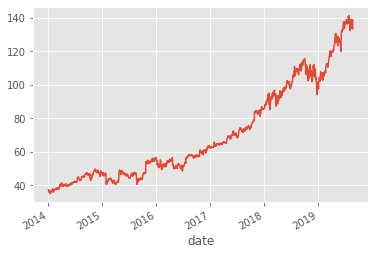

In [34]:
msft.plot()

The question is, how do we plot all three of these on the same graph within Pandas? Fortunately, when we call `plot()` on a dataframe, Pandas automatically plots all columns as separate line graphs. So all we need to do is create a dataframe that contains the three series we want.

We can do this using the Pandas `.concat()` method!

In [35]:
dfs = pd.concat([fb, msft, aapl], axis = 1)

In [36]:
dfs.head()

,Facebook,Microsoft,Apple
date,,,
2014-01-02,54.71,37.16,79.02
2014-01-03,54.56,36.91,77.28
2014-01-06,57.20,36.13,77.70
2014-01-07,57.92,36.41,77.15
2014-01-08,58.23,35.76,77.64


Now we can plot those suckers.

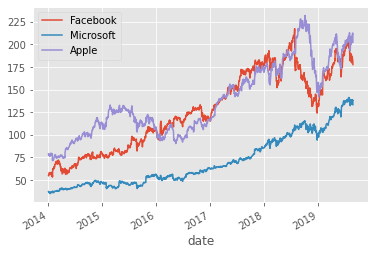

In [37]:
dfs.plot();

Awesome, and we didn't even need to import matplotlib to accomplish this. 

By the way, if we want to break these up into separate subplots within the same figure, all we need to do is set the `subplots` parameter to `True`, which creates a separate subplot for each column of data.

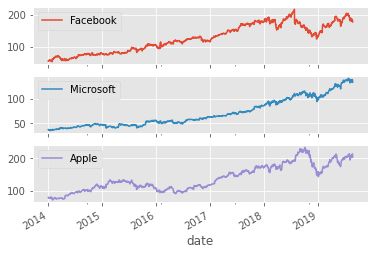

In [38]:
dfs.plot(subplots = True);

Let's make these fat lines a bit skinner with hte `linewidth` parameter.

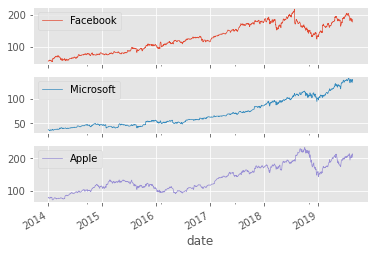

In [39]:
dfs.plot(subplots = True, linewidth = 0.7);

And to reshape the whole figure, we can use the `figsize` parameter.

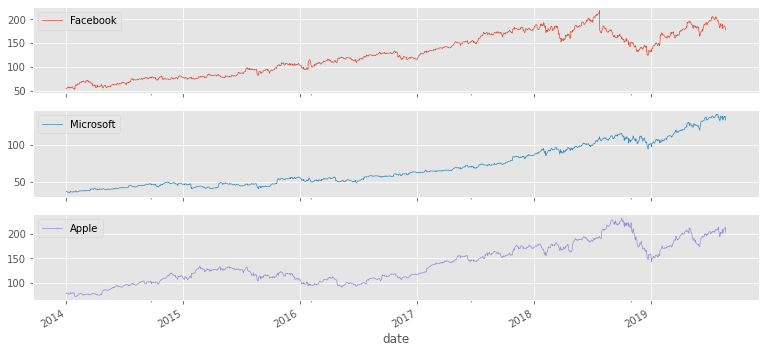

In [40]:
dfs.plot(subplots = True, linewidth = 0.7, figsize = (13, 6));

Essentially what's going on here is Pandas is exposing the matplotlib API for us. When we pass in the parameters, we're actually controlling matplotlib behind the scenes. But the Pandas inferface is just much simpler; the manual constructs from matplotlib have been abstracted away, leaving us with this nice interface.

## Bar Charts

**Bar charts** are used (and overused) for displaying numerical values across different categorical values (for example, number of marathon runners by age).

In fact, let's work with that second example. We'll start by importing or data again.

In [41]:
boston = pd.read_csv('https://andybek.com/pandas-marathon')

In [42]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


We'll use age as our *categorical* variable, and within each age we'll count the number of runners.

Let's start by isolating "age".

In [43]:
boston.Age

0      24
1      30
2      25
3      32
4      31
       ..
995    38
996    43
997    40
998    35
999    35
Name: Age, Length: 1000, dtype: int64

This returns a sequence of integers. There's not too much we can do with this. A standard `plot()` will look like nonsense.

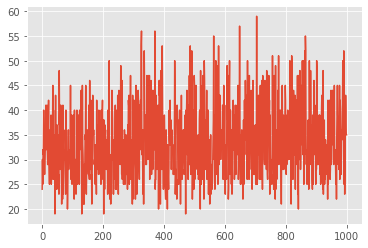

In [44]:
boston.Age.plot()

So, we need to go from a sequence of integers representing the ages, to a combination of categories and numerical values. In this particular case, we can do this using the `value_counts()` method.

In [45]:
boston.Age.value_counts()

28    60
30    60
26    56
29    56
32    53
36    50
27    49
33    49
35    48
31    44
25    41
34    37
39    35
37    33
40    33
24    29
38    29
41    29
23    23
42    22
43    21
44    18
45    17
47    15
22    15
46    12
50    12
21    12
48     9
49     6
52     5
20     5
19     4
53     4
51     3
55     2
56     2
57     1
59     1
Name: Age, dtype: int64

This is terrific. This has returned a Series containing all of the unique values in "Age", and the number of times those values appear. So the index is the value of Age, and the value is the number of times each Age appears in the dataset. We're ready to plot, ladies and gents. And to do this, we will use the `kind` parameter and set it to `bar`.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
* Alternatively, we can use the `plot.bar()` method.

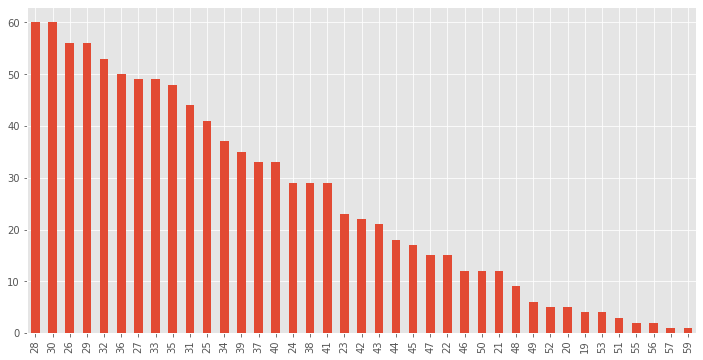

In [46]:
boston.Age.value_counts().plot(kind = 'bar', figsize = (12, 6));

This plot gives us the Age on the x-axis and the count of that age on the y-axis. Let's label these for clarity. How do we do that? We first have to get a handle on the *AxesSubplot* that is being returned by this method call. We can observe it explicitly by removing the suppressive semicolon.

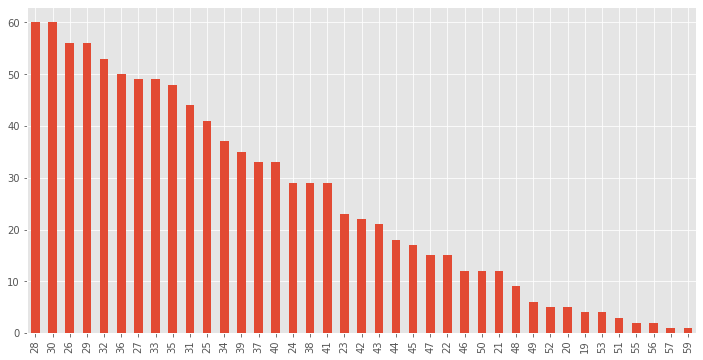

In [47]:
boston.Age.value_counts().plot(kind = 'bar', figsize = (12, 6))

This isn't terribly helpful though. What we need to do is actually create a variable for this axis object, which will then allow us to use the labeling methods.

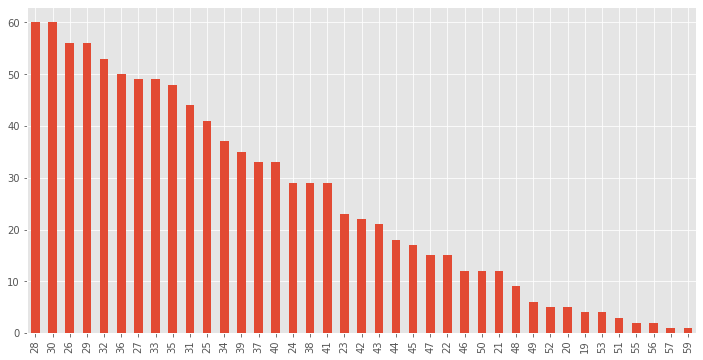

In [48]:
ax = boston.Age.value_counts().plot(kind = 'bar', figsize = (12, 6));

Now we can call the label methods on the axis object.
* https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html

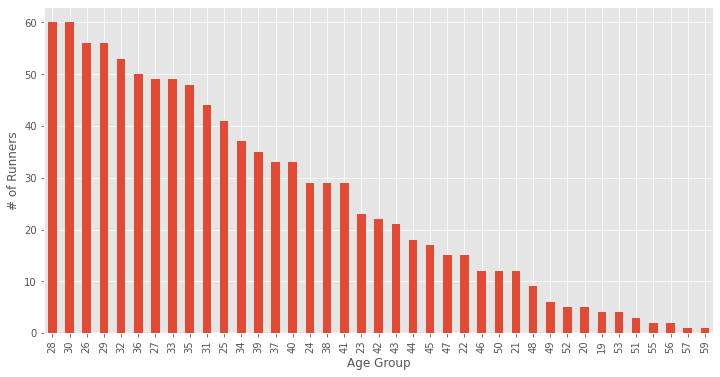

In [49]:
ax = boston.Age.value_counts().plot(kind = 'bar', figsize = (12, 6));
ax.set_xlabel('Age Group');
ax.set_ylabel('# of Runners');

Much better. But notice something confusing - the Age categories are not incremental. Instead they are somewhat random. This is because `value_counts()` automatically sorts the output in decreasing order, as is abundantly clear from the graph. So perhaps one thing we should do is sort the Age labels. All we have to do is set the `sort` parameter within `value_counts()` to `False`!

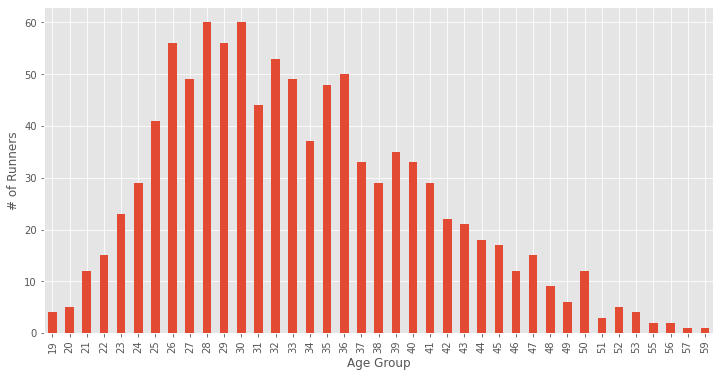

In [50]:
ax = boston.Age.value_counts(sort = False).plot(kind = 'bar', figsize = (12, 6));
ax.set_xlabel('Age Group');
ax.set_ylabel('# of Runners');

Lastly, we might be interested in producting *horizonal* barcharts. This is easily done by setting the `kind` parameter to `barh`.

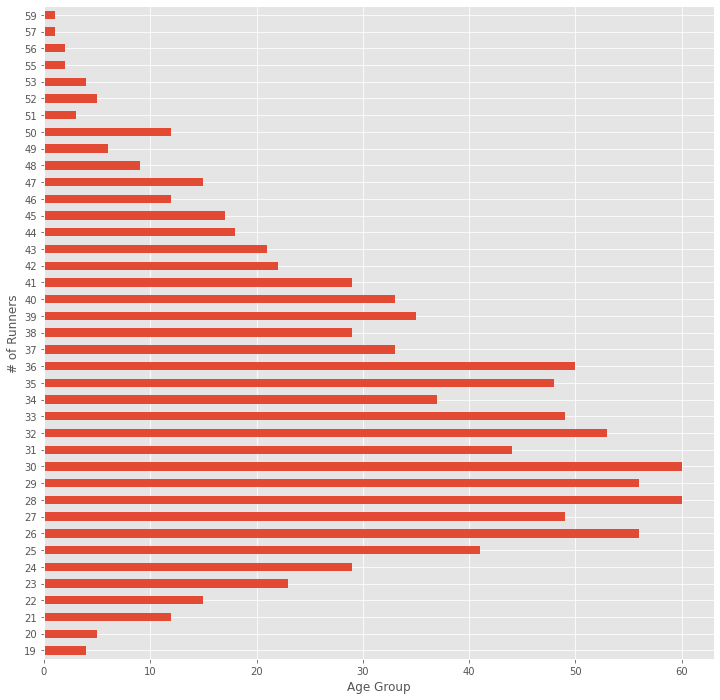

In [51]:
ax = boston.Age.value_counts(sort = False).plot(kind = 'barh', figsize = (12, 12));
ax.set_xlabel('Age Group');
ax.set_ylabel('# of Runners');

As a last little exercise, let's plot marathon runners by gender.

In [52]:
boston.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


When plotting this data, we can actually create the x- and y-axis labels inline using the `xlabel` and `ylabel` parameters.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

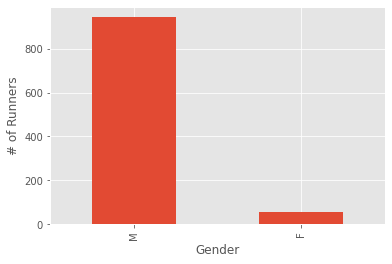

In [53]:
boston['M/F'].value_counts().plot(kind = 'bar', xlabel = 'Gender', ylabel = '# of Runners');

Raw counts are not the best output in some cases. We can convert this to percentages using the `normalize` parameter within `value_counts()`.

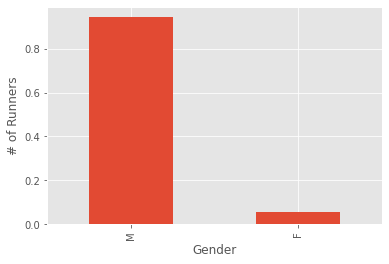

In [54]:
boston['M/F'].value_counts(normalize = True).plot(kind = 'bar', xlabel = 'Gender', ylabel = '# of Runners');

## Pie Plots

**Pie charts** are popular plots used to show how a total quantity is divided between its component parts. Similarly to bar charts, they show a numerical amount associated with categorical values. However, pie charts focus on summarizing a total amount and its division into components.

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

They have gradually fallen out of favor in data presentation for a number of reasons, including the misleading look of 3D pie charts.

Let's start by bringing back our `games` data from earlier in the course.

In [55]:
games = pd.read_csv('https://andybek.com/pandas-games')

In [56]:
games.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64


Suppose we want to know the market share for each gaming platform in North America. We will nee the "NA_Sales" series, which we can group by "Platform" and summarize by aggregate sum. We can then tack on a call to `plot()`, where all we need to do is pass in 'pie' to the `kind` parameter.

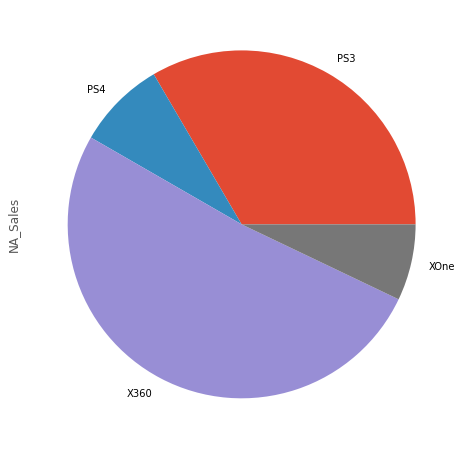

In [57]:
games.groupby('Platform')['NA_Sales'].sum().plot(kind = 'pie', figsize = (8, 8))

We see that the Xbox360 has the largest share of the North American market. Notice how easy it was to create a Pandas series from our dataframe and then call the plot functions on it. The entire process was essentially seamless. 

But what happens if we call `plot()` on an entire dataframe? We'll try that as we answer the next question.

What's happpening in the other markets? Let's check out Japan. Does the Playstation dominate there since Sony is a Japanese company? As we answer this question, we'll create a smaller dataframe and see if we can plot a chart by making a call on that dataframe.

In [58]:
games.loc[:,['NA_Sales','JP_Sales','Platform']].groupby('Platform').sum()

,NA_Sales,JP_Sales
Platform,,
PS3,392.26,79.99
PS4,96.80,14.30
X360,601.05,12.43
XOne,83.19,0.34


Now we have a nice small dataframe that shows the sales of the ocnsoles in North America and Japan. Note that these are absolute numbers, not proportions.

Now, what happens if we call `plot` on this dataframe?

In [59]:
## Generates ValueError: pie requires either y column or 'subplots=True'
# games.loc[:,['NA_Sales','JP_Sales','Platform']].groupby('Platform').sum().plot(kind = 'pie')

This creates a `ValueError`. The function needs us to specify a "y" column so or set `subplots` to `True`

Let's start with at he first approach by setting `y = 'NA_Sales`

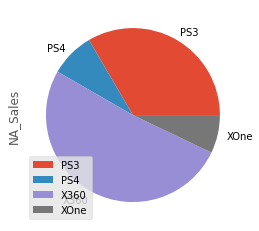

In [60]:
games.loc[:,['NA_Sales','JP_Sales','Platform']].groupby('Platform').sum().plot(kind = 'pie', y = 'NA_Sales')

Here we got a pie chart that's identical to the one above, showing the proportions of sales in North America only. So we're not quite there yet. What we need to do is set `subplots = True`.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0305a00e90>,
      dtype=object)

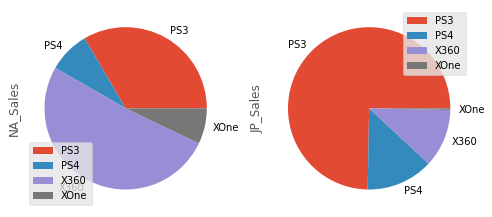

In [61]:
games.loc[:,['NA_Sales','JP_Sales','Platform']].groupby('Platform').sum().plot(kind = 'pie', subplots = True, figsize = (8, 8))

That's much better. We now see both plots on the same figure, and we can clearly see that Sony Playstation dominates game sales in that region.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0305932cd0>,
      dtype=object)

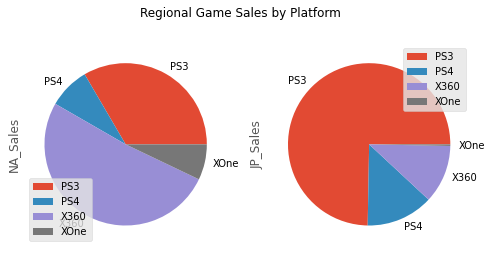

In [62]:
games.loc[:,['NA_Sales','JP_Sales','Platform']].groupby('Platform').sum().plot(kind = 'pie', subplots = True, title = 'Regional Game Sales by Platform', figsize = (8, 4))

More on how to create Pandas pie charts here: https://www.statology.org/pandas-pie-chart/

## Histograms

A **histogram** is a chart that plots the distribution of a numeric value as a series of bars. As opposed to bar charts which quantify the frequency of categorical values, histograms quantify the frequency of a numeric values.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html

To explore histograms, let's bring back our `drinks` dataset.



In [63]:
drinks = pd.read_csv('https://andybek.com/pandas-drinks')

In [64]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9


As you might have guessed, to create a histogram we simply call `plot()` and set `kind = 'hist'`. Of course we'll also need to choose a series to plot. Let's try "beer_servings".

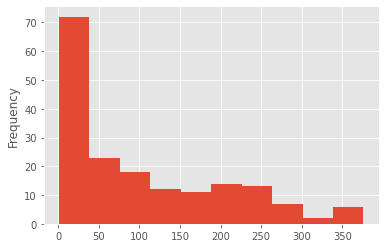

In [65]:
drinks['beer_servings'].plot(kind = 'hist')

According to this plot, most countries have been zero and 50 beer servings per year. 

Let's label the x-axis by handling the axis object.

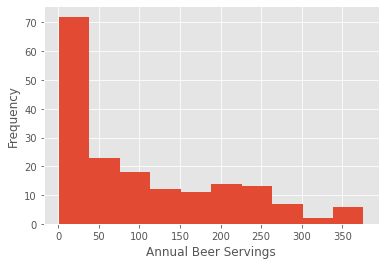

In [66]:
ax = drinks['beer_servings'].plot(kind = 'hist');
ax.set_xlabel('Annual Beer Servings');

One of the choices you have to make when using histograms is the bin size. For a given fixed range, the smaller the bin size, the larger the number of bars. This decision comes down to the specifics of the dataset. In Pandas and matplotlib, the bin size is controlled by the `bins` parameter.  

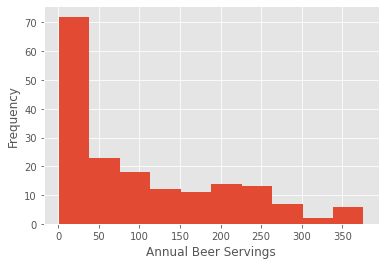

In [67]:
ax = drinks['beer_servings'].plot(kind = 'hist', bins = 10);
ax.set_xlabel('Annual Beer Servings');

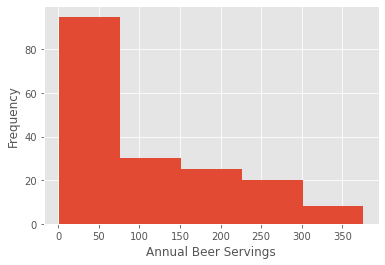

In [68]:
ax = drinks['beer_servings'].plot(kind = 'hist', bins = 5);
ax.set_xlabel('Annual Beer Servings');

When decreasing the number of bins to 5, the overall shape of the histogram is maintained, but we lose a bit of granularity. How about 15 bins?

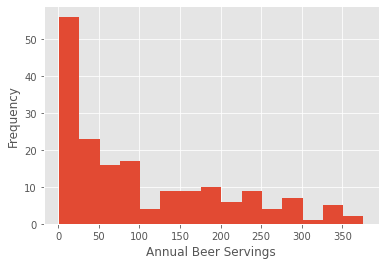

In [69]:
ax = drinks['beer_servings'].plot(kind = 'hist', bins = 15);
ax.set_xlabel('Annual Beer Servings');

Check that out. Overall, the frequency of beer servings tends to decreass with increasing number of servings, but there are a few high-servings bins with higher frequencies such that the profile is not uniformly decreasing. We therefore gain additional insight from having a higher number of bins. The analyst must find a balance in selecting bin size for each plot that he/she creates.

We can edit the *orientation* of the histogram.

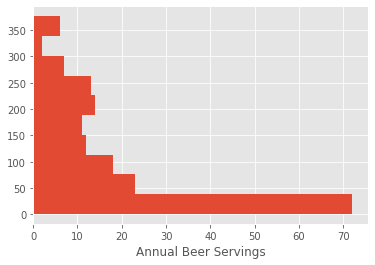

In [70]:
ax = drinks['beer_servings'].plot(kind = 'hist', orientation = 'horizontal');
ax.set_xlabel('Annual Beer Servings');

What happens if we call the `plot()` method on a dataframe instead of a series?

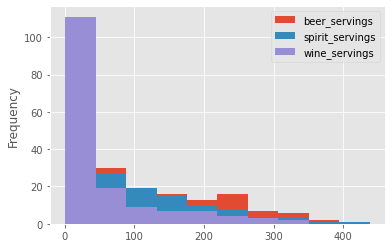

In [71]:
drinks.loc[:, 'beer_servings':'wine_servings'].plot(kind = 'hist')

As we can see, the default behavior is the create overlapping histograms with different colored bins. This can be somewhat misleading, given that the distributions overlap significantly. For example, the beer_servings data is completely covered up by the "wine_servings" data. Overall the chart is quite difficult to read.

One way to get around this is to *overlay transparency* by invoking the `alpha` parameter.

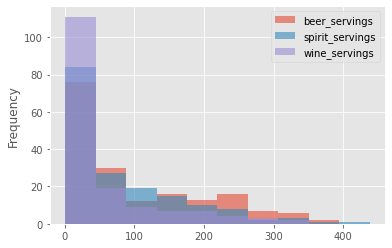

In [72]:
drinks.loc[:, 'beer_servings':'wine_servings'].plot(kind = 'hist', alpha = 0.6)

That's a little better, but the histogram still feels overloaded and heavy. So instead, we can create individual histograms from the different series. We'll use the `subplots()` parameter to do this.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0305edfa10>,
      dtype=object)

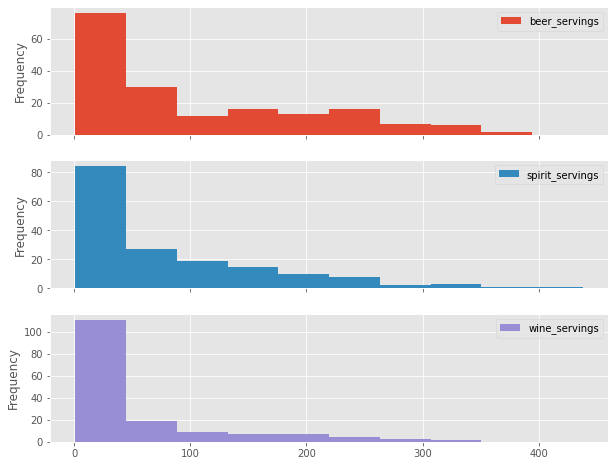

In [73]:
drinks.loc[:, 'beer_servings':'wine_servings'].plot(kind = 'hist', subplots = True, figsize = (10, 8))

That is much better.

To summarize, we use histograms when we want to understand the distribution of a numeric sequence of values.

## Scatter Plots

**Scatter plots** are used to visualize the relationship between two numeric variables. Generally speaking, they demonstrate how one variable changes as another variable changes. 

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html

A word of caution is that just because two variables may change in a certain way, it does not necessarily mean that one variable is "causing" the change in the other.

To explore scatter plots, we'll use the SAT scores dataset from earlier.

In [74]:
sat = pd.read_csv('https://andybek.com/pandas-sat')

In [75]:
sat.head()

,School Name,Borough,Student Enrollment,Percent Tested,SAT Section,Score
0,A. Philip Randolph Campus High School,Manhattan,1354,74.00%,Math,459
1,A. Philip Randolph Campus High School,Manhattan,1354,74.00%,Reading,453
2,A. Philip Randolph Campus High School,Manhattan,1354,74.00%,Writing,447
3,Abraham Lincoln High School,Brooklyn,2341,54.90%,Math,441
4,Abraham Lincoln High School,Brooklyn,2341,54.90%,Reading,422


Let's answer the following question: Is there a relationship between the section scores for the SAt? In other words, if a school scores strongly in one section, do they tend to also score strongly in another section?

More specifically, *is reading and writing more strongly correlated than reading and mathemetics?*

Before we start going wild with the `plot()` function, we'll need to reshape our data because at the moment it is not in a structure that is conducive to plotting. Each section score takes up a separate row, and the score column combines sections from all schools. So the first thing we need to do is to isolate the individual section scores into their own series.

In [76]:
math = sat[sat['SAT Section'] == "Math"].Score.reset_index(drop = True)

In [77]:
math

0      459
1      441
2      444
3      386
4      381
      ... 
370    484
371    496
372    478
373    483
374    415
Name: Score, Length: 375, dtype: int64

Great, we've got a single sequence of values containing the SAT Math section scores. Let's do the same for writing and reading.

In [78]:
reading = sat[sat['SAT Section'] == "Reading"].Score.reset_index(drop = True)

In [79]:
writing = sat[sat['SAT Section'] == "Writing"].Score.reset_index(drop = True)

So now we have all of our scores in series. Let's concatenate them into a single dataframe. 

In [80]:
pd.concat([math, writing, reading], axis = 1)

,Score,Score,Score
0,459,447,453
1,441,422,422
2,444,444,458
3,386,393,397
4,381,390,397
...,...,...,...
370,484,487,491
371,496,473,481
372,478,472,465
373,483,477,464


Notice that all of the columns have the same name of "Score". That's confusing and misleading. So we'll rename them by first saving the concatenated dataframe to a variable `scores`, then modifying the `columns` attribute of `scores` to reflect the names we want.

In [81]:
scores = pd.concat([math, writing, reading], axis = 1)

In [82]:
scores.columns = ['Math','Writing','Reading']

In [83]:
scores

,Math,Writing,Reading
0,459,447,453
1,441,422,422
2,444,444,458
3,386,393,397
4,381,390,397
...,...,...,...
370,484,487,491
371,496,473,481
372,478,472,465
373,483,477,464


We're not ready to create the scatterplot. 

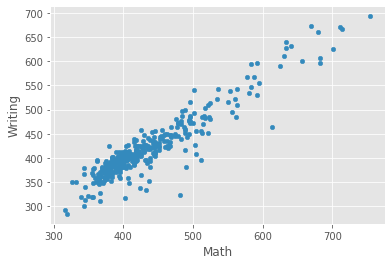

In [84]:
scores.plot(kind = 'scatter', x = "Math", y = 'Writing');

Would you look at that! There seems to be a positive correlation between Math and Writing scores. 

As an aside, let's calculate the correlation coefficient.

In [85]:
math.corr(writing)

0.9341552744743191

Interesting! How about the association between reading and writing?

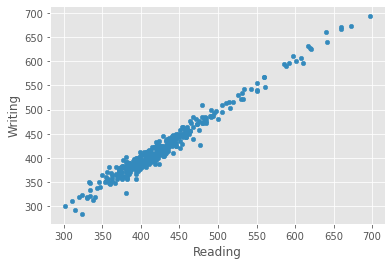

In [86]:
scores.plot(kind = 'scatter', x = "Reading", y = 'Writing');

In [87]:
reading.corr(writing)

0.9854389581058104

Wow, this correlation is even stronger! Higher reading scores are quite strongly associated with higher writing scores.

## Other Visualization Options: Seaborn and GGPlot

The data visualization options in Pandas rely on and expand upon matplotlib. Matplotlib also provides the API for other visualization tooks, including gppy and seaborn. 

That said, using the matplotlib API can sometimes be low-level and result in repetitive code. Over time, new packages with easier and shorter syntax and better default graphical styles have emerged. 

One such option is **seaborn**, which is already included in many data analysis Python distributions.
* https://seaborn.pydata.org/

In [88]:
pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: matplotlib, pandas, numpy, scipy
Required-by: missingno


Let's go ahead and import seaborn.

In [89]:
import seaborn as sns

Now let's use it on our SAT scores data that we previous created for the scatterplot lesson.

In [90]:
scores.head()

,Math,Writing,Reading
0,459,447,453
1,441,422,422
2,444,444,458
3,386,393,397
4,381,390,397


One of the greatest advantages of seaborn is the ability to create relatively complex multiplot graphs and charts using very short and easy syntax.

For instance, we can visualize the relationship between math and writing SAT scores using a **joint plot**. The joint plot combines single-variable histograms for each sequence of values as well as a scatterplot of the variables in front and center.
* https://seaborn.pydata.org/generated/seaborn.jointplot.html

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


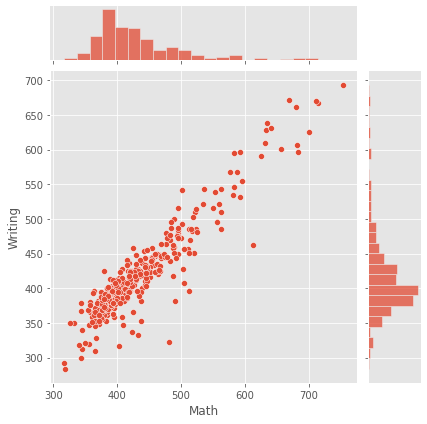

In [91]:
sns.jointplot('Math', 'Writing', scores, kind = 'scatter')

That is beautiful. This shows the frequency distributions of the scores for both sections, as well as a scatterplot showing correlation between the scores. 

Notice that there is significant overlap of points in the bottom left corner of the scatterplot, which can make it difficult to identify trends or scrutinize the data. To get around this, we often rely on a technique called **hexagonal gaining**, which better identifies trends and densities in the observations. Using seaborn, this is as easy as changing the `kind` parameter from "scatter" to "hex".

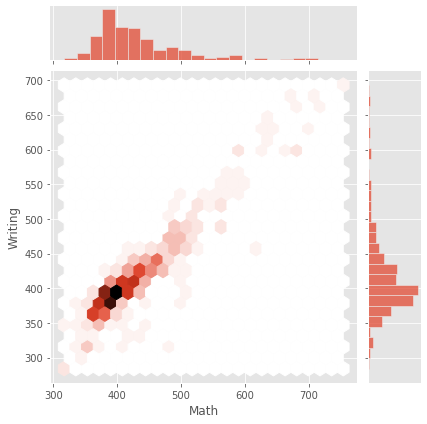

In [95]:
sns.jointplot(x = 'Math', y = 'Writing', data = scores, kind = 'hex');

The author encourages additional exploration of seaborn plots, where there is a lot of impressive data visualization that can be achieved. 
* https://seaborn.pydata.org/examples/index.html

**ggplot** is another data visualization library. It offers a very expressive and short syntax compared to matplotlib. Keep in mind that when using ggplot, we favor convenience and syntax over customizability. The instructor favors this library.
* https://ggplot2.tidyverse.org/

In general, the choice of data visualization library should be driven by what you want to portray. A quick-and-dirty look at the data can be served by ggplot2 and seaborn. But extensive customization and complexity is perhaps better served by matplotlib. Similarly, **plotly** and **bokeh** are excellent choices for interactive data visualizations.

Plotly: https://plotly.com/python/

Bokeh: https://bokeh.org/

## Bonus Lecture: Data Ink and Chartjunk

Data visualization is as much an art as it is a science. Sometimes people add too much visual flare to their charts that does nothing to help with communicating the data, and can sometimes detract from the intended message.

* https://en.wikipedia.org/wiki/Chartjunk

At the end of the day, any additional visual ink that's placed onto a chart should not be there if it does not add any value to interpretation of the data. The data-ink ratio should be as high as possible.
* https://www.holistics.io/blog/data-ink-ratio/
* https://www.darkhorseanalytics.com/blog/data-looks-better-naked

## Skill Challenge

#### 1. Starting with the `games` dataframe, create a pie plot that breaks down the *Global Sales* by gaming Platform.

We start by revisiting our `games` dataframe, where we see that we have a column that quantifies global sales.

In [96]:
games.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64


All we need to do now is group the data by platform and then apply the `sum()` function on the "Global_Sales" data.

In [102]:
games.groupby("Platform")['Global_Sales'].sum()

Platform
PS3     957.84
PS4     278.10
X360    979.96
XOne    141.06
Name: Global_Sales, dtype: float64

We can now make a nice pie plot out of this by calling `plot()`. Let's add a little extra by placing the percentages on the pie slices. 

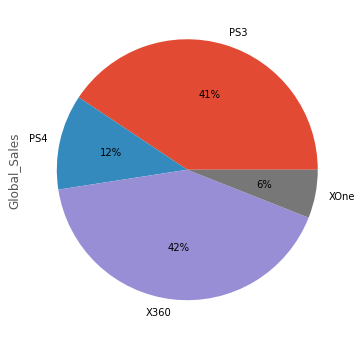

In [115]:
games.groupby("Platform")['Global_Sales'].sum().plot(kind = 'pie', autopct='%1.0f%%', figsize = (6,6))

#### 2. Using the same `games` dataframe, create a smaller dataframe that contains total *Global_Sales* across all *Platforms* from all releases in the sports *Genre*. Set *Name* as the index of this new dataframe and assign it to the variable `sports_games`.

In [117]:
games.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64


For this bit, we'll use the `loc[]` indexer to snag all of the games that correspond to the Sports genre, and from there we will use `loc[]` again to subset our dataframe so that we only keep the "Name",and "Global_Sales" columns. Finaly, we'll use `set_index()` to set "Name" as our dataframe index.

In [118]:
games.loc[games["Genre"] == "Sports"].loc[:,['Name', 'Global_Sales']].set_index("Name")

,Global_Sales
Name,
FIFA 16,8.49
FIFA 14,6.90
FIFA 12,6.69
FIFA 15,6.59
Kinect Sports,6.24
...,...
WSC REAL 09: World Snooker Championship,0.01
World Snooker Championship 2007,0.01
Handball 16,0.01


However, we need to make one more adjustment. Since these sales are across all platforms, some of the best-selling sports games appear on this list more than once.

In [122]:
games.loc[games["Genre"] == "Sports"].loc[:,['Name', 'Global_Sales']].set_index("Name").index.value_counts()

Madden NFL 25                             4
WWE 2K16                                  4
Don Bradman Cricket 14                    4
NBA 2K16                                  4
FIFA 15                                   4
                                         ..
Pro Yaky? Spirits 2012                    1
Tony Hawk's American Wasteland            1
Michael Phelps: Push the Limit            1
Blitz: The League                         1
Summer Challenge: Athletics Tournament    1
Name: Name, Length: 288, dtype: int64

In order to get a true sense of the title-centric sales, we'll group this data by game name and get the global sales sum.

In [125]:
games.loc[games["Genre"] == "Sports"].loc[:,['Name', 'Global_Sales']].groupby("Name").sum()

,Global_Sales
Name,
2010 FIFA World Cup South Africa,2.09
2014 FIFA World Cup Brazil,1.18
After Hours Athletes,0.12
All-Pro Football 2K8,0.41
Amped 3,0.16
...,...
Your Shape: Fitness Evolved,1.33
Your Shape: Fitness Evolved 2012,1.17
Zumba Fitness,2.98


Notice how our total number of rows has been reduced from 512 to 288. Finally, let's save this as `sports_games`.

In [126]:
sports_games = games.loc[games["Genre"] == "Sports"].loc[:,['Name', 'Global_Sales']].groupby("Name").sum()

#### 3. Using the `sports_games` dataframe you just created, create a bar chart of the Top 20 best selling games. In other words, we want the 20 games with the highest global sales, and we want to quantify those sales in a bar chart. Based on the visualized data and without doing any specific number calculations, how does the difference between the 1st and 10th best selling games compare to that between the 11th and 20th best selling games?

Let's do this. All we really need to do is sort the games by "Global_Sales", then call `plot()` on that sorted data, ensuring that we only include the top 20 best-selling sports games.

In [127]:
sports_games.sort_values(by = "Global_Sales", ascending = False)

,Global_Sales
Name,
FIFA 15,16.67
FIFA 16,16.26
FIFA 14,15.30
FIFA 12,10.88
FIFA Soccer 11,8.61
...,...
Winning Post 7 Maximum 2008,0.01
Sega Golf Club: Miyazato San Kyoudai Naizou,0.01
LMA Manager 2007,0.01


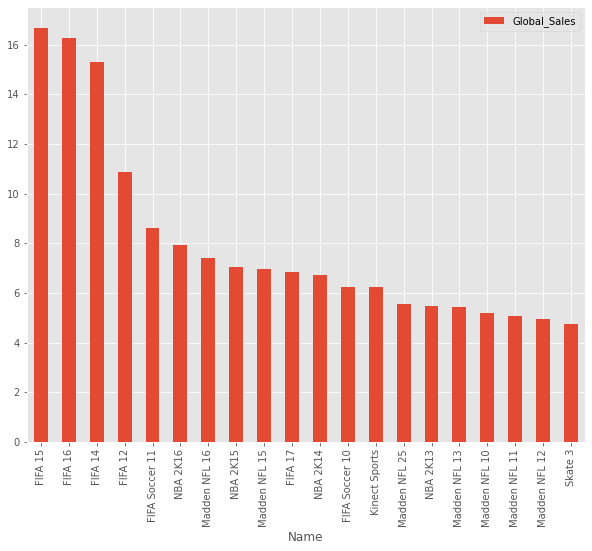

In [130]:
sports_games.sort_values(by = "Global_Sales", ascending = False).head(20).plot(kind = 'bar', figsize = (10,8))

And there we have it. The FIFA and Madden NFL titles dominate the top 20. In answering the questions based solely on this visualization, *FIFA 15* which is the best-selling sports game globally across all platforms looks like it has about twice the sales as *FIFA 17*, which is the 10th best-selling game. That's more than \$7 million greater. By comparison, the 11th best-selling sports game *NBA 2K14* only has \$2 million more in global sales. 